## This Notebook contains linear regression from scratch and i have tried to answer these questions


    - Why is R2 horrible for determining the quality of a model and name at least two better metrics.
    - What is the difference between logistic and linear regression? How do you avoid local minima?


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score,mean_squared_error
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import clear_output

In [18]:
data= pd.read_csv('data/whreport.csv').drop(['Overall rank', 'Country or region',
       'Freedom to make life choices',
       'Perceptions of corruption'],axis=1)
data.columns=['score','GDP','social_support','health_life_exp','generosity']
train_x,val_x,train_y,val_y= train_test_split(data[['GDP']],data['score'])
# ,'social_support','health_life_exp','generosity'
val_x= val_x['GDP'].values
print('Dataset has :',data.shape[0],'Rows',data.shape[1],'Columns')


##  Single Variable Linear Regression from scratch

In [8]:
class linear_regression:
    def __init__(self,alpha,num_iters):
        self.alpha= alpha
        self.num_iters= num_iters
        self.theta= None
        self.bias= None
    def score(self,Y,h_x):
        n= len(Y)
        error= 1/n *(np.sum((Y-h_x)**2))
        return error
    def fit(self,X,Y):
        self.theta= np.zeros(X.shape[0])
        self.bias= 0
        h_x= np.dot(self.theta ,X)+self.bias
        h_x_pre= h_x
        n= len(X)
        for _ in range(self.num_iters):
            d_theta= - (2/n) * np.dot((Y-h_x),X.T)
            d_bias= -(2/n) * np.sum(Y-h_x)
            self.theta= self.theta - self.alpha * d_theta
            self.bias= self.bias - self.alpha * d_bias
            h_x= np.dot(self.theta ,X)+self.bias        
            print(self.score(Y,h_x)*100)
            clear_output(wait=True)
        print('Training Error :',self.score(Y,h_x)*100)
        return h_x_pre,h_x
    
    def predict(self,X):
        h_x= np.multiply(self.theta,X)+self.bias
        return h_x


lr= linear_regression(0.001,100)
X= np.array([train_x['GDP']])
Y= train_y
h_x_pre,h_x= lr.fit(X,Y)
answer= lr.predict(val_x)
print('Testing Error: ',r2_score(answer,val_y)*100)
#UnderFit

Training Error : 48.25883029606174
Testing Error:  54.118641945461675


##  Multivariable Linear Regression from scratch

In [5]:
data= pd.read_csv('data/whreport.csv').drop(['Overall rank', 'Country or region',
       'Freedom to make life choices',
       'Perceptions of corruption'],axis=1)

data.columns=['score','GDP','social_support','health_life_exp','generosity']
train_x,val_x,train_y,val_y= train_test_split(data[['GDP','social_support','health_life_exp','generosity']],data['score'])


In [44]:
class multivariable_linear_regression:
    def __init__(self,alpha,num_iters):
        self.alpha= alpha
        self.num_iters= num_iters
        self.theta= None
        self.bias= None
        self.N= None
    def score(self,Y,h_x):
        error= (1/self.N) * np.sum((Y-h_x)**2)
        return error
    
    def fit(self,X,Y):
        self.N = len(Y)
        self.theta=np.zeros(X.shape[1]) #(4,)
        self.bias= 0        
        h_x= np.dot(X,self.theta)+self.bias
        h_x_pre= h_x

        for _ in range(self.num_iters):
            d_theta= - (2/self.N) * np.dot(X.T,(y-h_x))
            d_bias=  - (2/self.N) * np.sum((Y-h_x))
            self.theta= self.theta - self.alpha * d_theta
            self.bias = self.bias  - self.alpha * d_bias
            h_x= np.dot(X,self.theta)+self.bias
        print('Training error :',self.score(Y,h_x))
        return h_x_pre,h_x
    def predict(self,X):
        h_x= np.dot(X,self.theta)+ self.bias
        return h_x
mlr= multivariable_linear_regression(0.01,100)
X= train_x #(117, 4)
y= train_y #(117,)

## Q1: Why is R2 horrible for determining the quality of a model and name at least two better metrics.
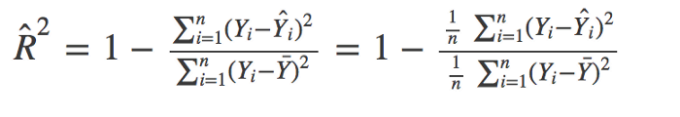

In [83]:
h_x_pre, h_x= mlr.fit(train_x[['social_support','GDP']],train_y)
answer= mlr.predict(val_x[['social_support','GDP']])
print('Testing error \033[1m r2 \033[0m score :--->',r2_score(answer,val_y))
print('Testing error mean_absolute_error :',mean_absolute_error(answer,val_y))
# print('Testing error accuracy_score :',accuracy_score(answer,val_y))
print('Testing error mean_squared_error :',mean_squared_error(answer,val_y))

Training error : 0.3893192489088195
Testing error  r2  score :---> 0.6603001088824396
Testing error mean_absolute_error : 0.5042210592535868
Testing error mean_squared_error : 0.4109006392933513


In [82]:
h_x_pre, h_x= mlr.fit(train_x[['social_support','GDP','health_life_exp']],train_y)
answer= mlr.predict(val_x[['social_support','GDP','health_life_exp']])
print('Testing error \033[1m r2 \033[0m score:-->',r2_score(answer,val_y))
print('Testing error mean_absolute_error :',mean_absolute_error(answer,val_y))
print('Testing error mean_squared_error :',mean_squared_error(answer,val_y))

Training error : 0.3834955284878505
Testing error  r2  score:--> 0.717353238386037
Testing error mean_absolute_error : 0.47475556671258207
Testing error mean_squared_error : 0.38157020782719603


##  As we can see, ${R^2}$ is getting increased by adding additional highly corelated feature althought the performance of  model is not getting improved. Mean absolute error and mean squared error are pretty good alternatives


## Q2: How to avoid local minima?
Repeated training with random starting weights is among the popular methods to avoid this problem, but it requires extensive computational time.


## What are the four assumption made in linear regression ?
The Four Assumptions of Linear Regression

-    Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.
-    Independence: The residuals are independent. ...
-    Homoscedasticity: The residuals have constant variance at every level of x.
-    Normality: The residuals of the model are normally distributed.